## Import Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Eksplorasi Data

In [47]:
df = pd.read_csv('../data iris.csv', delimiter=";")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Melihat Informasi Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Cleaning

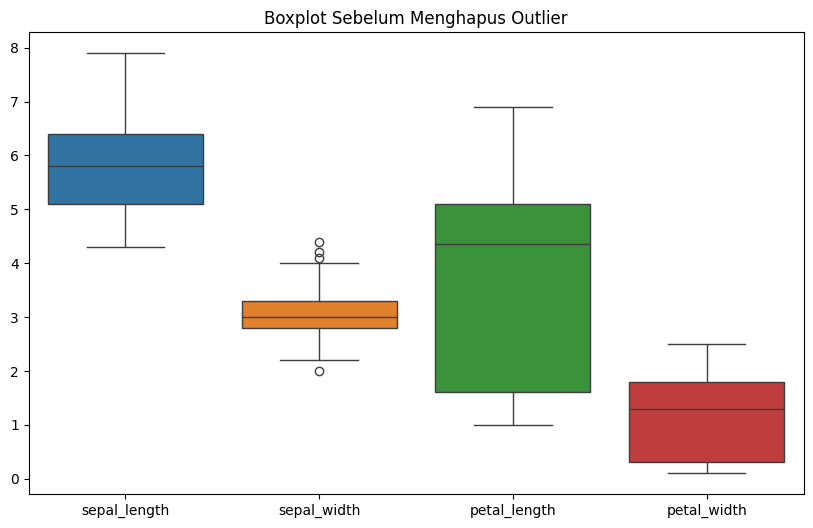

In [50]:
# Boxplot sebelum menghapus outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,:-1])
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

dalam kode di atas kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh fitur. Dari hasil yang di atas, kita dapat melihat **terdapat outliers** untuk bagian **sepal_width** di bawah persegi (**lingkaran pada titik y di angka mendekati 2**) dan di atas titik y 4.


In [51]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")

# Hapus Outlier
df = df[~((df.iloc[:, :-1] < lower_bound)| (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")

Jumlah data sebelum menghapus outlier: 150
Jumlah data setelah menghapus outlier: 146


## 


dalam kode di atas, kita menggunakan metode **IQR** untuk menghilangkan outliernya. Metode ini bekerja dengan cara menghapus data yang berada di luar rentang normal, yaitu data yang berada di bawah batas bawah (lower bound) dan di atas batas atas (upper bound).


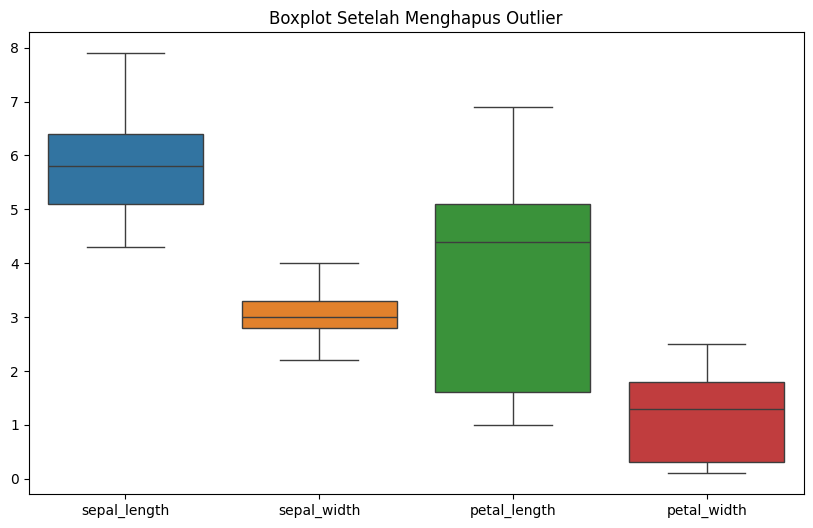

In [52]:
# Boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:]) # Exclude kolom 'class'
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()



Dalam kode `sns.boxplot(data=df.iloc[:, :-1])`, kita memvisualisasikan data setelah menghapus outlier. Dari boxplot, kita dapat melihat bahwa **tidak ada lagi outlier**, yang ditandai dengan lingkaran di luar whiskers. Hal ini menunjukkan bahwa data telah bersih dan distribusinya kini lebih sesuai dengan rentang normal.


In [53]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica



dalam kode di atas `df[df.duplicated()]` kita mencoba melihat apakah **ada data yang terduplikasi atau tidak**. Dari hasil tersebut, kita dapat melihat kalau **ada data yang terduplikasi**. Maka kita akan masuk pada tahapan selanjutnya untuk menghilangkan data duplikasi tersebut.


In [54]:
df.drop_duplicates(inplace=True)
df.shape

(143, 5)


dalam kode di atas `df.drop_duplicates(inplace=True)` telah menghilangkan data yang terduplikasi tersebut. kemudian pada kode `df.shape` kita dapat melihat hasil **kolom dan baris** nya menjadi `(143, 4)`.


In [55]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


dalam kode di atas `df.isna().sum()` kita akan melihat dari data tersebut apakah `ada data kosong atau tidak`. Dari hasil diatas tidak terdapat data yang kosong. Maka kita bisa lanjut ke tahapan selanjutnya. `df.isna()` artinya kita akan melihat untuk apakah suatu data itu kosong atau tidak. `.sum()` digunakan untuk menghitung berapa banyak data untuk setiap kolom yang hilang.

In [56]:
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
        self.error = 0
        self.__X__ = None
        self.__Y__ = None
        self.is_trained = False  # Tambahkan flag training

    def fit(self, x, y, m=0, b=0, learning_rate=0.01, epoch=100):
        x = np.array(x)  # Pastikan x adalah numpy array
        y = np.array(y)  # Pastikan y adalah numpy array
        n = len(x)

        self.__X__ = x
        self.__Y__ = y
        self.m = m
        self.b = b

        for _ in range(epoch):
            y_current = self.m * x + self.b
            self.error = np.mean((y - y_current) ** 2)

            m_gradient = -(2/n) * np.sum(x * (y - y_current))
            b_gradient = -(2/n) * np.sum(y - y_current)

            self.m -= learning_rate * m_gradient
            self.b -= learning_rate * b_gradient

        self.is_trained = True  # Tandai bahwa model sudah dilatih

    def predict(self, x):
        if not self.is_trained:
            return "Data belum dilatih, panggil fit() terlebih dahulu."
        
        return self.m * np.array(x) + self.b

    def predict_all(self):
        if not self.is_trained:
            return "Data belum dilatih, panggil fit() terlebih dahulu."
        
        return self.predict(self.__X__)

    def scores(self, y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

        return 1 - (ss_res / ss_tot)




In [57]:
def Train_Test_Split(x, y, test_size=0.2, random_seed=42):
    n = len(x)
    if not (0 < test_size < 1):
        raise ValueError("test_size harus antara 0 dan 1")

    if random_seed:
        np.random.seed(random_seed)

    test_size = int(n * test_size)
    indices = np.random.permutation(n)

    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    x_train, x_test = np.array(x)[train_indices], np.array(x)[test_indices]
    y_train, y_test = np.array(y)[train_indices], np.array(y)[test_indices]

    return x_train, x_test, y_train, y_test


In [58]:
x = np.array(df.sepal_length.array) 
y = np.array(df.petal_length.array)

# x = np.array([i for i in range(1, 11)])
# y = np.array([270, 350, 500, 700, 800, 850, 900, 900, 1000, 1200])

# x[0]

In [59]:
X_train, X_test, y_train, y_test = Train_Test_Split(x, y, 0.2, 42)

In [60]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train, learning_rate=0.0001, epoch=10000)

In [61]:
linear_regression.m,linear_regression.b

(0.6999175724859523, -0.17557444857117724)

In [62]:
train_scores = linear_regression.scores(y_train, linear_regression.predict(X_train))

"the predict train scores : " + str(train_scores * 100 )[:5] +"%"

'the predict train scores : 47.79%'

In [63]:
test_scores = linear_regression.scores(y_test, linear_regression.predict(X_test))

"the predict test scores : " + str(test_scores * 100 )[:5] +"%"

'the predict test scores : 43.18%'

<Axes: >

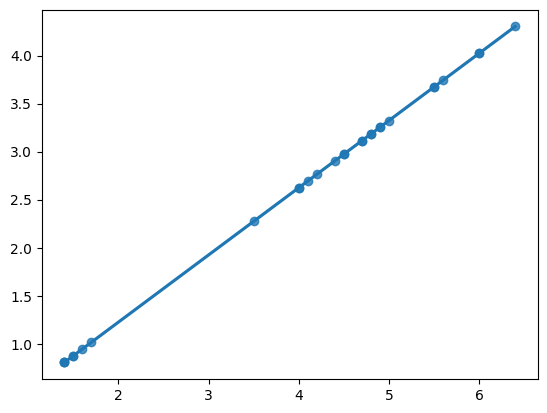

In [64]:
sns.regplot(x=y_test, y=linear_regression.predict(y_test))

Text(0, 0.5, 'scores')

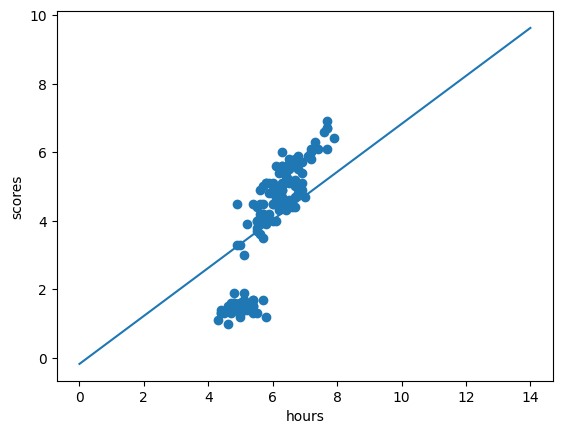

In [65]:
# linear_regression.predict(4)
plt.scatter(x, y)
x_graphics = np.array([i for i in range(15)])
plt.plot(x_graphics, linear_regression.predict(x_graphics))
plt.xlabel("hours")
plt.ylabel("scores")